# Heart Disease Prediction - Classification using DecisionClassifier and Pruning

<img src= "https://miro.medium.com/max/1400/1*3UDYyZDhH0dWvbrLem0g5Q.jpeg"/>

## Data Set Information:

This database contains 14 attributes, The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. 

## Metadata:

-  **age**,       Age of the Person
-  **sex**,       Gender (Category)

                    - 0 = Female

                    - 1 = male

-  **cp**,        Chest Pain (Category)

                    - 1 = typical angina

                    - 2 = atypical anigna

                    - 3 = non-anigna pain

                    - 4 = asymptomatic

-  **restbps**,   resting bp
-  **chol**,      cholestrol
-  **fbs**,       fasting blood suger (Category)

                    - 0 => 120mg/dl

                    - 1 =< 120mg/dl

-  **restecg**,   resting electrocardiographic results (Category)

                    - 1 = normal

                    - 2 = having ST-T wave abnormality

                    - 3 = Showing probable or definite left ventricular hypertrophy

-  **thalach**,   Maximum heart rate achieved 
-  **exang**,     excercise induced angina (Category)

                    - 0 = no

                    - 1 = yes

-  **oldpeak**,   ST Depression induced by excercise relative to rest
-  **slope**,     The slope of the peak excercise ST Segment (Category)

                    - 1 = unsloping

                    - 2 = flat

                    - 3 = downsloping

-  **ca**,        No. of measured Vessels (0-3) Colured by fluroscopy
-  **thal**,      Thalium Heart Scan (Category)

                    - 3 = normal

                    - 6 = fixed defect

                    - 7 = reversible defect

-  **HD**,       The predicted attribute

                    - 0 = for no heart deisease
                    
                    - 1 to 4 = for severity of heard deisease

## Importing Modules

In [135]:
# Data Manipulation
import pandas as pd
import numpy as np

# Vizualizations
import matplotlib.pyplot as plt

# Modelling
from sklearn.tree import DecisionTreeClassifier #To draw Classification Tree
from sklearn.tree import plot_tree # To draw a classification tree

from sklearn.model_selection import train_test_split # To split data into train and test set
from sklearn.model_selection import cross_val_score # For Cross Validation

from sklearn.metrics import confusion_matrix # To create CM
from sklearn.metrics import plot_confusion_matrix # TO draw CM

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [136]:
# Downloading the csv file from your GitHub account
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data" 

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(url, header= None)

#Peeking the data
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [137]:
# Renaming Column Names
df.columns = [  'age',      
                'sex',       
                'cp',        
                'restbps',   
                'chol',      
                'fbs',       
                'restecg',   
                'thalach',   
                'exang',     
                'oldpeak',   
                'slope',     
                'ca',        
                'thal',      
                'HD' ]

#Peeking the data
df.head(5)

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HD
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [138]:
# Data Summary
df.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
HD           int64
dtype: object

The column cal and thal has object data type, they might contain combination of letters and numbers.

HD is int type which makes sense because it has categories from 0 to 4.

And the rest column types are floats.

## Missing Data

In [139]:
# Summary of all the columns
df.describe().T

# Finding the unique values in column 'ca'
print("Unique Vslues in ca", df['ca'].unique())
print("Unique Vslues in thal",df['thal'].unique())

# Checking for null values in each column
print("Null Values", df.isnull().sum().sum() )

Unique Vslues in ca ['0.0' '3.0' '2.0' '1.0' '?']
Unique Vslues in thal ['6.0' '3.0' '7.0' '?']
Null Values 0


There are total 303 number of rows.

There are NO nulls in the data set. 

But there is '?' present in two columns ('ca' and 'thal').

In [140]:
# Looking at row with cal = '?'
print("Number of rows with '?' :" , len(df[df['ca'] == '?']))
df[df['ca'] == '?']

Number of rows with '?' : 4


,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HD
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [141]:
# Looking at row with thal = '?'
print("Number of rows with '?' :" , len(df[df['thal'] == '?']))
df[df['thal'] == '?']

Number of rows with '?' : 2


,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HD
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [142]:
# Deleting these Rows since they are only a few records
df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
print(len(df))
print(df['ca'].unique())
print(df['thal'].unique())

297
['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


## Modelling

In [143]:
# Columns with independent Variable
X = df.drop('HD', axis = 1)
X.head()

# Columns with Dependent (Response) Variable
Y = df['HD']
Y.head()

0    0
1    2
2    1
3    0
4    0
Name: HD, dtype: int64

In [144]:
# Creating dummy Variables
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg' , 'slope', 'thal'])
X_encoded.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In order to have 0 and 1 instead of 5 differnt values (0 to 4) 

in our response variable, let's covert any 1,2,3,4 into 1.

In [145]:
# Converting HD != 0  to 1
Y_Non_zero = Y > 1  #get index for each non-zero value in Y
Y[Y_Non_zero] = 1
Y.unique()          # Confirm we only have zeros and ones

array([0, 1], dtype=int64)

In [146]:
# Splitting into test and training dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state=42)

## Preliminary Classification Tree

In [147]:
# creating a decision tree with training data set
dtm = DecisionTreeClassifier(random_state=42)
dtm = dtm.fit(X_train, Y_train)

[Text(479.8318965517241, 520.95, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(277.79741379310343, 475.65000000000003, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(169.5646551724138, 430.35, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(122.66379310344828, 385.05, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(72.15517241379311, 339.75, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(43.293103448275865, 294.45, 'restbps <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(28.862068965517242, 249.14999999999998, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(14.431034482758621, 203.84999999999997, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(43.293103448275865, 203.84999999999997, 'exang <= 0.5\ngini = 0.5\nsamples = 2\nval

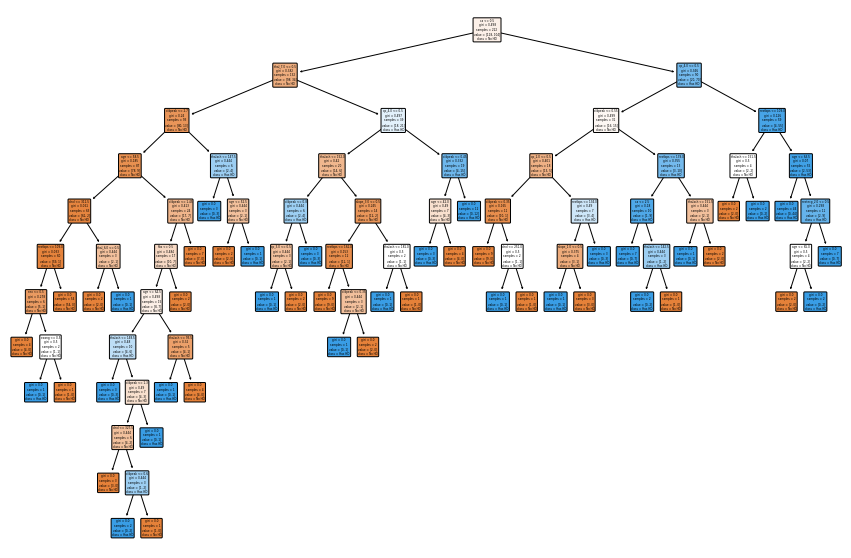

In [148]:
# Vizualizing the tree we built
plt.figure(figsize= (15,10))
plot_tree(dtm, class_names= ["No HD","Has HD"],
                feature_names=X_encoded.columns, 
                filled= True,
                rounded= True)

- Plotting th confusion matrix by running on test dataset


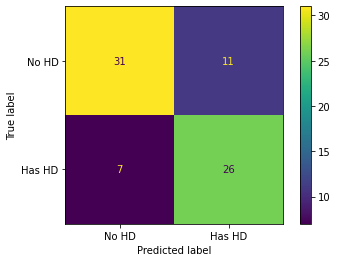

In [149]:
# Confusion Matrix
plot_confusion_matrix(dtm, X_test,Y_test, display_labels=["No HD" , "Has HD"])

As per the confusion matrix 11 people with NO heart disease were incorrectly classified as people with heart disease and 7 people who has a Heart Disease were incorrectly classified as No heart disease.

## Pruning: Visualize Alpha

Decision tree are known for overfitting to training set. We can adjust a lot of features like max_depth and min_samples that are designed to overfit. This method it tedious. However a tree with *Cost Complexity pruning* can simplify the process by finding the smallest tree that improves accuraty for Testing dataset.

Pruning is all about finiding the optimum value of a parameter *alpha* which controls how little or large pruning needs to happen. 

It is done by plotting a graph b/w acuracy of the tree as a function of different values on both training and testing datasets.


In [150]:
path = dtm.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]


arr_dt = []

# Creating decision tree for each alpha
for i in ccp_alphas: 
    print(i)
    dtm = DecisionTreeClassifier(random_state=0, ccp_alpha = i)
    dtm.fit(X_train, Y_train)
    arr_dt.append(dtm)

0.0
0.0029529529529529544
0.003861003861003862
0.004054054054054055
0.004095004095004095
0.004293579293579285
0.005148005148005148
0.005412976001211295
0.005787605787605791
0.006006006006006006
0.006006006006006006
0.006006006006006006
0.006675906675906675
0.006756756756756757
0.007573750220809049
0.008115048793014888
0.008687258687258686
0.008898508898508902
0.01038181038181038
0.010577695922523542
0.014224751066856332
0.016040512147297445
0.01642461319880674
0.0210307473465368
0.036800058669932925
0.039345232893619964


Plotting the accuracy of trees using training and testing dataset asfunction of alpha

In [162]:
for i in arr_dt:
    p = i.score(X_train, Y_train)
    print(p)

1.0
0.9954954954954955
0.9864864864864865
0.9819819819819819
0.9774774774774775
0.972972972972973
0.972972972972973
0.972972972972973
0.963963963963964
0.9279279279279279
0.9279279279279279
0.9279279279279279
0.9054054054054054
0.9009009009009009
0.9009009009009009
0.8918918918918919
0.8828828828828829
0.8783783783783784
0.8693693693693694
0.8693693693693694
0.8513513513513513
0.8513513513513513
0.8108108108108109
0.7747747747747747
0.7702702702702703
0.7567567567567568


In [152]:
# Vizualizing Alpha and acuracy for each decision tree
train_score = []
test_score = []

for i in arr_dt:
    p = i.score(X_train, Y_train)
    train_score.append(p)
    q = i.score(X_test, Y_test)
    test_score.append(q)
# train_score.append( [dtm.score(X_train, Y_train) for i in arr_dt] )
# test_score.append( [dtm.score(X_test, Y_test) for i in arr_dt] )


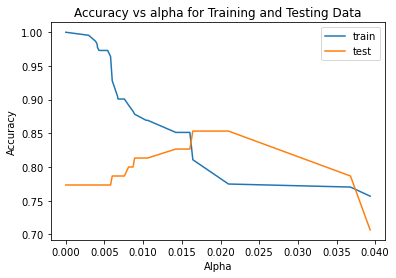

In [153]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for Training and Testing Data")
ax.plot(ccp_alphas, train_score, label = "train")
ax.plot(ccp_alphas, test_score, label = "test")
ax.legend()
plt.show()

The graph shows that the optimal value for the alphas is 0.16

## Cross Validation
As we know for this particular training set the optimal value ofalpha comes out to be 0.016, but it could be different for different data sets. Therefore, we would cross validate with K-fold validation method.

,tree,accuracy
0,0,0.533333
1,1,0.866667
2,2,0.750000
3,3,0.750000
4,4,0.772727


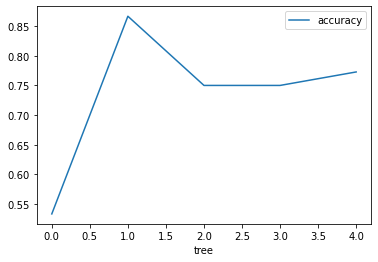

In [154]:
dtm =  DecisionTreeClassifier(random_state=42, ccp_alpha = 0.016)

# Since our data  set is pretty small we decides to use 5-fold cross validation
scores = cross_val_score(dtm, X_train, Y_train, cv = 5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})

df.plot(x = 'tree', y = 'accuracy')
df

The graph shows that using different training and testing data with same alpha results in different accuracies, this means alpha is sensitive to dataset. So, instaeed of picking a single training and testing data set, so we will use cross validation to find optimal value for alpha.

In [155]:
# Now performing K-fold cross validation for each Alpha value
alpha_values = []

for i in ccp_alphas:
    dtm = DecisionTreeClassifier(random_state= 0 , ccp_alpha=i)
    scores = cross_val_score(dtm, X_train, Y_train, cv = 5)
    alpha_values.append( [i, np.mean(scores), np.std(scores)] )

In [156]:
alpha_results = pd.DataFrame( alpha_values, columns=['alpha', 'mean_Accuracy', 'std'])
optimal_alpha = alpha_results.sort_values(by = 'mean_Accuracy', ascending= False)[:1]
optimal_alpha

,alpha,mean_Accuracy,std
20,0.014225,0.747778,0.091395


The best mean Accuracy of 0.74 is achevied by alpha 0.014 

<AxesSubplot:xlabel='alpha'>

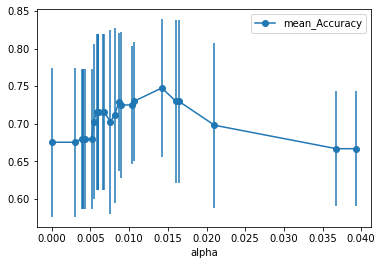

In [157]:
# Visualizing the Accuracy
alpha_results.plot(x = 'alpha',y = 'mean_Accuracy', yerr = 'std',marker = 'o')

It could be also seen in graph that the highest mean accuracy is achieved when alpha was 0.014

In [158]:
optimal_alpha = alpha_results.sort_values(by = 'mean_Accuracy', ascending= False)[:1]
optimal_alpha = float(optimal_alpha['alpha'])


## Let's build the Model with optimal alpha

In [159]:
final_dtm = DecisionTreeClassifier(random_state= 42, ccp_alpha= optimal_alpha)
final_dtm_fit = final_dtm.fit(X_train, Y_train)

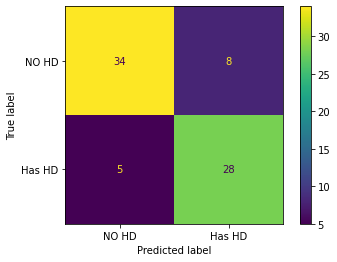

In [160]:
# Creating Confusion matrix
plot_confusion_matrix(final_dtm_fit, X_test, Y_test, display_labels= ["NO HD", "Has HD"])

This pruned tree is clasifying then the full size classification tree.

34/(34+8) = 81% who do not have Heart disease were correctly classified, in case of a full size tree the percent was 31/(31+11) = 74%.

28/(5+28) = 85% who have Heart Disease were correctly classified, in case of a full size tree the percent was 26/(26+7) 79%.

## The Final Decision tree


[Text(643.8461538461538, 475.65000000000003, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(343.38461538461536, 339.75, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(171.69230769230768, 203.85000000000002, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(85.84615384615384, 67.94999999999999, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(257.53846153846155, 67.94999999999999, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Has HD'),
 Text(515.0769230769231, 203.85000000000002, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Has HD'),
 Text(429.23076923076917, 67.94999999999999, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(600.9230769230769, 67.94999999999999, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Has HD'),
 Text(944.3076923076923, 339.75, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue

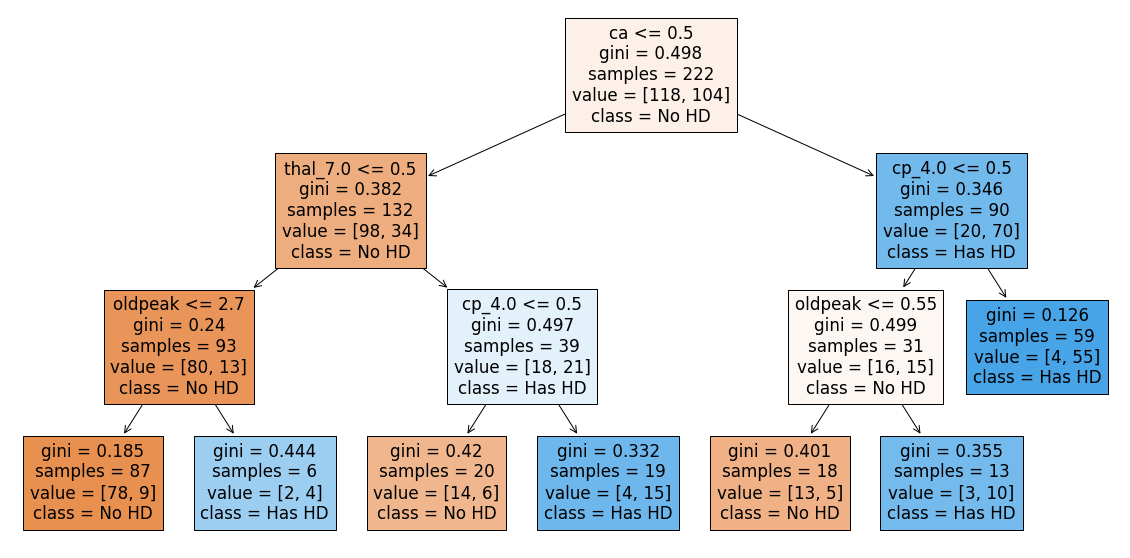

In [161]:
plt.figure(figsize= (20, 10))
plot_tree(final_dtm_fit, filled=True, class_names= ["No HD", "Has HD"],
            feature_names= X_encoded.columns)
